<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [8]:
# notice: installing seaborn might takes a few minutes
#!pip install seaborn

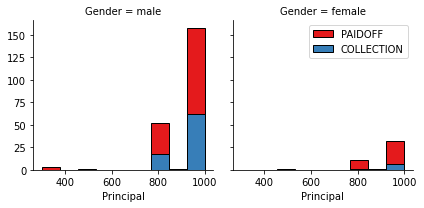

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

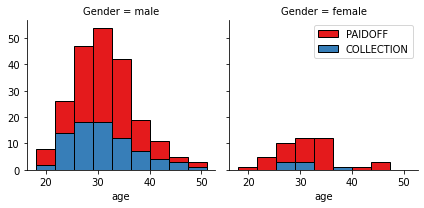

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


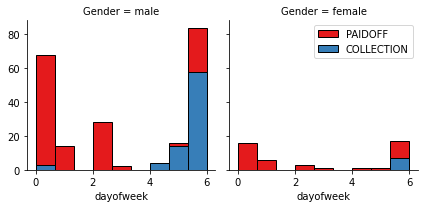

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
# Get y and encode the values
from sklearn.preprocessing import LabelEncoder
y = df['loan_status'].values
y_coder = LabelEncoder()
y = y_coder.fit_transform(y)
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [22]:
# Iterating and appending scores for K values in list
k_list = range(1,21,1)
in_sample_score_list = pd.Series()
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors=k)
    y_hat = cross_val_predict(neigh, X, y, cv=3)
    new_score = pd.Series([(f1_score(y_hat, y)).round(4)])
    in_sample_score_list = in_sample_score_list.append(new_score)


#### Best k = 5

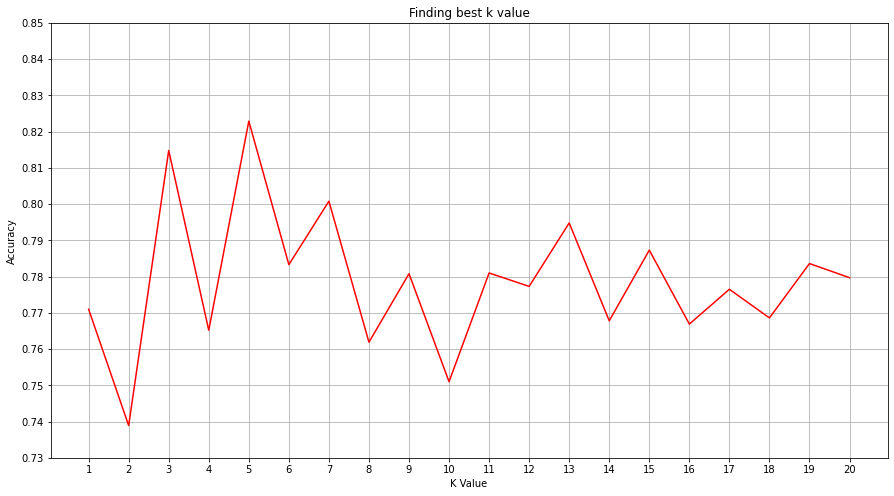

In [23]:
# Plotting F1 Scores vs K Values
fig, ax =  plt.subplots(figsize=(15,8))
ax.plot(k_list, in_sample_score_list, linestyle='-', color = 'red')
plt.grid(True)
plt.xticks(ticks=k_list, labels=k_list)
plt.yticks(ticks=np.arange(0.73,0.86,0.01))
plt.xlabel("K Value")
plt.ylabel('Accuracy')
plt.title("Finding best k value")
plt.show()

#### Prediction

In [24]:
#The Model using Best K Value
k = 5
best_neigh = KNeighborsClassifier(n_neighbors=k)
best_neigh.fit(X, y)
y_pred = best_neigh.predict(X)

In [25]:
# Evaluation
f1_accuracy= f1_score(y_pred, y)
print(f"F1_Score prediction using KNN: {f1_accuracy.round(4)}")

jac_accuracy= jaccard_score(y_pred, y)
print(f"JACCARD_Score prediction using KNN: {jac_accuracy.round(4)}")

F1_Score prediction using KNN: 0.8825
JACCARD_Score prediction using KNN: 0.7896


### KNN Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
params ={
    'n_neighbors':k_list
    }
grid_knn = GridSearchCV(neigh, params, scoring='f1', cv = 3)

grid_knn.fit(X,y)
grid_knn.best_score_.round(4)

0.816

#### Best k with GridSearchCV = 5

In [27]:
k_list[grid_knn.best_index_]

5

#### Prediction using GridSearchCV KNN

In [28]:
y_pred = grid_knn.predict(X)

In [29]:
f1_accuracy= f1_score(y_pred, y)
print(f"F1_Score prediction using KNN: {f1_accuracy.round(4)}")

jac_accuracy= jaccard_score(y_pred, y)
print(f"JACCARD_Score prediction using KNN: {jac_accuracy.round(4)}")


F1_Score prediction using KNN: 0.8825
JACCARD_Score prediction using KNN: 0.7896


# Decision Tree


#### Train and Evaluate

In [30]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(criterion='entropy')
params ={
    "max_depth" : [1,2,3,4,5,6,7,8,9,10]
}
grid_tree = GridSearchCV(d_tree, params, scoring = 'f1', cv=3)
grid_tree.fit(X,y)
grid_tree.best_score_.round(4)

0.783

#### Parameters used in DecisionTree

In [31]:
grid_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Prediction and tree

In [32]:
y_pred = grid_tree.predict(X)

In [33]:
f1_accuracy= f1_score(y_pred, y)
print(f"F1_Score prediction using Decision Tree: {f1_accuracy.round(4)}")

jac_accuracy= jaccard_score(y_pred, y)
print(f"JACCARD_Score prediction using Tree: {jac_accuracy.round(4)}")

F1_Score prediction using Decision Tree: 0.8427
JACCARD_Score prediction using Tree: 0.7282


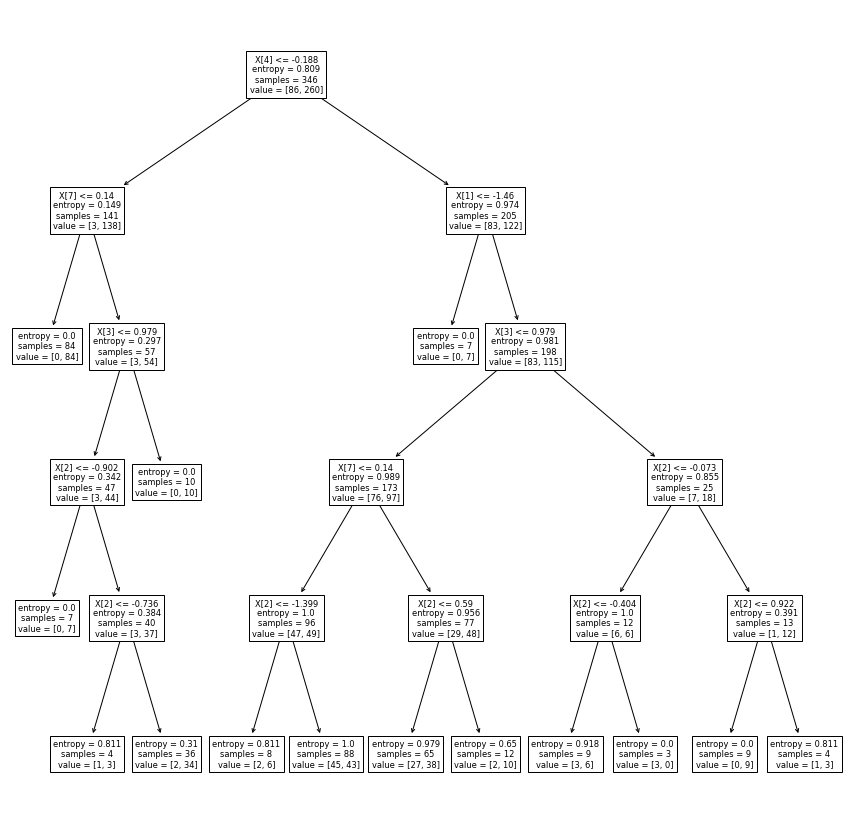

In [34]:
import sklearn.tree as tree
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(grid_tree.best_estimator_, ax=ax)
plt.show()

# Support Vector Machine


In [35]:
from sklearn import svm

model = svm.SVC()

params = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
}
grid_svm = GridSearchCV(model, params, scoring='jaccard', cv=3)
grid_svm.fit(X,y)
grid_svm.best_score_.round(4)

0.6327

In [36]:
grid_svm.best_estimator_

SVC()

#### Prediction

In [37]:
ypred = grid_svm.predict(X)

In [38]:
f1_accuracy= f1_score(y_pred, y)
print(f"F1_Score prediction using SVM: {f1_accuracy.round(4)}")

jac_accuracy= jaccard_score(y_pred, y)
print(f"JACCARD_Score prediction using SVM: {jac_accuracy.round(4)}")


F1_Score prediction using SVM: 0.8427
JACCARD_Score prediction using SVM: 0.7282


# Logistic Regression


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LR = LogisticRegression(solver='liblinear')

params = {
    'penalty': ['l1', 'l2'],
    'C': [number for number in np.arange(0,1.01,0.01)],    
}

In [41]:
grid_logistic = GridSearchCV(LR, params, scoring='jaccard', cv=3).fit(X, y)
grid_logistic.best_score_.round(4)

0.5659

In [42]:
grid_logistic.best_estimator_

LogisticRegression(C=0.63, solver='liblinear')

#### Prediction

In [43]:
y_pred = grid_logistic.predict(X)

In [44]:
f1_accuracy= f1_score(y_pred, y)
print(f"F1_Score prediction using Logistic Regression: {f1_accuracy.round(4)}")

jac_accuracy= jaccard_score(y_pred, y)
print(f"JACCARD_Score prediction using Logistic Regression: {jac_accuracy.round(4)}")

log_accuracy= log_loss(y_pred, y)
print(f"Log_Loss using Logistic Regression: {log_accuracy.round(4)}")

F1_Score prediction using Logistic Regression: 0.8537
JACCARD_Score prediction using Logistic Regression: 0.7447
Log_Loss using Logistic Regression: 8.485


# Model Evaluation using Test set


In [45]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [46]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [47]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [48]:
# Convert effective_date and due_date to datetime objects
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# Make day of week column
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

# Make weeekend Column
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# Make categorical numeric
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [49]:
test_features = test_df[['Principal','terms','age','Gender','weekend']]
test_features = pd.concat([test_features,pd.get_dummies(test_df['education'])], axis=1)
test_features.drop(['Master or Above'], axis = 1,inplace=True)
test_features.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [50]:
test_features.isna().sum()

Principal               0
terms                   0
age                     0
Gender                  0
weekend                 0
Bechalor                0
High School or Below    0
college                 0
dtype: int64

In [51]:
X_test = test_features
X_test = preprocessing.StandardScaler().fit_transform(X_test)
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [52]:
# Get y_test and encode the values
from sklearn.preprocessing import LabelEncoder
y_test = test_df['loan_status'].values
y_test = y_coder.fit_transform(y_test)
y[0:5]

array([1, 1, 1, 1, 1])

# Prediction

In [53]:
# KNN
knn_pred = grid_knn.predict(X_test)

# Decision Tree
tree_pred = grid_tree.predict(X_test)

#SVM
svm_pred = grid_svm.predict(X_test)

# Logistic Regression
logistic_pred = grid_logistic.predict(X_test)

# Evaluation

In [54]:
# Dict of Jaccard Scores
jaccard_scores = {'KNN': jaccard_score(knn_pred,y_test).round(4),
                'Decision Tree' : jaccard_score(tree_pred,y_test).round(4),
                'SVM' : jaccard_score(svm_pred,y_test).round(4),
                'LogisticRegression' : jaccard_score(logistic_pred,y_test).round(4)
                 }

# Dict of F1 Scores
f1_scores = {'KNN': f1_score(knn_pred,y_test).round(4),
           'Decision Tree' : f1_score(tree_pred,y_test).round(4),
           'SVM' : f1_score(svm_pred,y_test).round(4),
           'LogisticRegression' : f1_score(logistic_pred,y_test).round(4)
          }

# Dict of Log Loss Scores
logloss_scores = {'KNN': 'NA', 
                'Decision Tree' : 'NA', 
                'SVM' : 'NA', 
                'LogisticRegression' : log_loss(logistic_pred,y_test).round(4)
               }
print(f'Jaccard : {jaccard_scores} \nF1_Score : {f1_scores} \nLogLoss : {logloss_scores}')

Jaccard : {'KNN': 0.6939, 'Decision Tree': 0.6875, 'SVM': 0.7222, 'LogisticRegression': 0.7547} 
F1_Score : {'KNN': 0.8193, 'Decision Tree': 0.8148, 'SVM': 0.8387, 'LogisticRegression': 0.8602} 
LogLoss : {'KNN': 'NA', 'Decision Tree': 'NA', 'SVM': 'NA', 'LogisticRegression': 8.3149}


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [55]:
pd.DataFrame(
        {
            'Jaccard' : jaccard_scores,
            'F1_score' : f1_scores,
            'LogLoss' : logloss_scores
        }
).iloc[:]

,Jaccard,F1_score,LogLoss
KNN,0.6939,0.8193,NA
Decision Tree,0.6875,0.8148,NA
SVM,0.7222,0.8387,NA
LogisticRegression,0.7547,0.8602,8.3149


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
